<a href="https://colab.research.google.com/github/THEABHASHARMA/CASE-STUDIES/blob/main/Kerala%20flood%20case%20study_cond_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#                        KERALA FLOOD CASE STUDY
# Problem Statement:


The dataset contains the monthly rainfall data from years 1901 to 2018 for the Indian state of Kerala.

It contains the monthly rainfall index of Kerela and also record weather a flood took place that month or not.

Your objective is to leverage conditional probability and Bayes' theorem to gain deep insights into the patterns and factors contributing to the ocuurance of floods in kerala

In [1]:
!gdown 1Mp2bQl5QJ6O2tcezb0ceBQIn8vW5us0N

Downloading...
From: https://drive.google.com/uc?id=1Mp2bQl5QJ6O2tcezb0ceBQIn8vW5us0N
To: /content/kerala.csv
100% 10.3k/10.3k [00:00<00:00, 23.3MB/s]


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("kerala.csv")

In [4]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [5]:
df.shape

(118, 16)

#Q. What is the average rainfall for each month over the years

In [6]:
cols = ['JAN', 'FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

monthly_avg = df[cols].mean()
monthly_avg

JAN     12.218644
FEB     15.633898
MAR     36.670339
APR    110.330508
MAY    228.644915
JUN    651.617797
JUL    698.220339
AUG    430.369492
SEP    246.207627
OCT    293.207627
NOV    162.311017
DEC     40.009322
dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 12 artists>

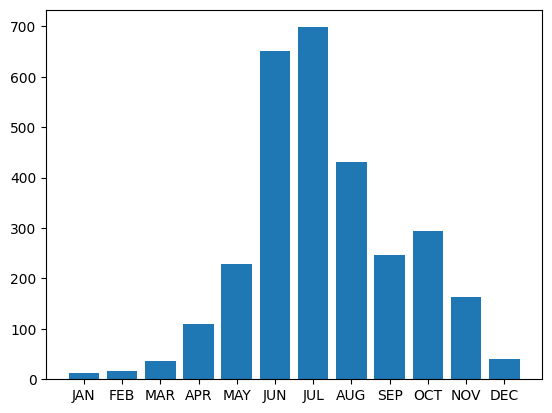

In [8]:
x= monthly_avg.index
y = monthly_avg

plt.bar(x,y)

We can make few conclusion here:

The data reveals significant seasonal variations in rainfall:


*   For instance, the month of June and July hav the highest rainfall, on an average. This suggests that two months are typically the wettest in the region.
*   The months of January and February hav the lowest avearge rainfall, these are typically the driest of months.


*   The rainfall in August and September is still relatively high but begins to decline.
*   The month of October, November, December have moderate to low average rainfall, with October having the highest average of the three.


You can see October has a higher avearge rainfall than September, Which may seem counterintuitive, as it should decline only.

There are two monsoon seasons in Kerala, one during June-August, other during October






To understand the reason behind it, we can check their yearly trends.

Let's look into the statistics of this dataset:

In [9]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


Here:



1.   The "mean" is representing average value for each column. For instance we can see that the average Annual rainfall is around 2925.405085(mean of Annual rainfall)
2.   "min" and "max" is representing Minimum and Maximun value for each column.



Let's try to visualise the  spread of our entir dataset using Box Plot.

In [10]:
columns = df.columns.tolist()
columns

['SUBDIVISION',
 'YEAR',
 'JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV',
 'DEC',
 ' ANNUAL RAINFALL',
 'FLOODS']

In [11]:
#only month columns
df2 = df[columns[1:14]]
df2.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [12]:
df3 = pd.melt(df2,
              id_vars = ['YEAR'],
              value_vars = ['JAN', 'FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],
              var_name = 'MONTH_ABBR', value_name = 'VALUE'
              )
df3.head()

,YEAR,MONTH_ABBR,VALUE
0,1901,JAN,28.7
1,1902,JAN,6.7
2,1903,JAN,3.2
3,1904,JAN,23.7
4,1905,JAN,1.2


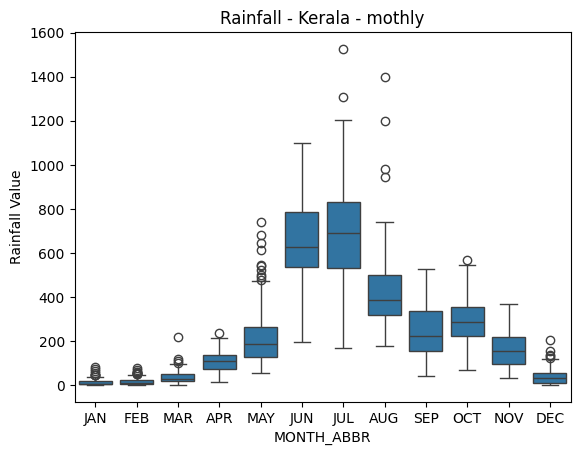

In [13]:
a = sns.boxplot(data=df3, x='MONTH_ABBR', y ='VALUE')
a.set_ylabel('Rainfall Value')
a.set_title('Rainfall - Kerala - mothly')

plt.show()

CONCLUSIONS:

We can clearly see that the rainfall is started to rise and is at peak in the month of June and July.

Then started to decline but again there is a rise in the month of October.

Through which we can conclude that kerala has two rainy seasons.

Let's plot the Annual rainfall and try to see yearly trend:


In [14]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [15]:
#rename ANNULA RAINFALL COLUMN NAME
df.columns = [ c.replace('ANNUAL RAINFALL', 'ANN_RAINFALL')for c in df.columns]
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANN_RAINFALL', 'FLOODS'],
      dtype='object')

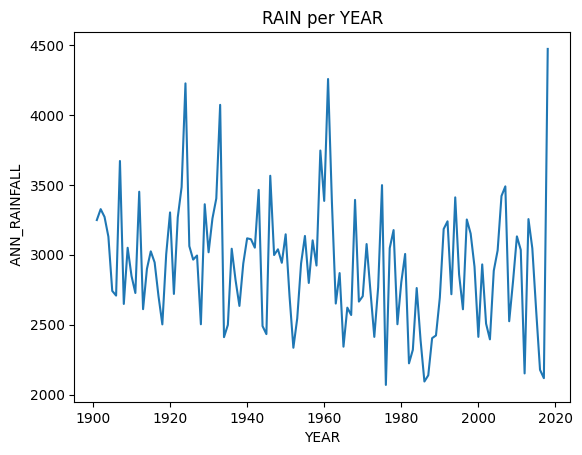

In [16]:
sns.lineplot(data = df, x = df["YEAR"], y = df[" ANN_RAINFALL"])
plt.title("RAIN per YEAR")
plt.show()

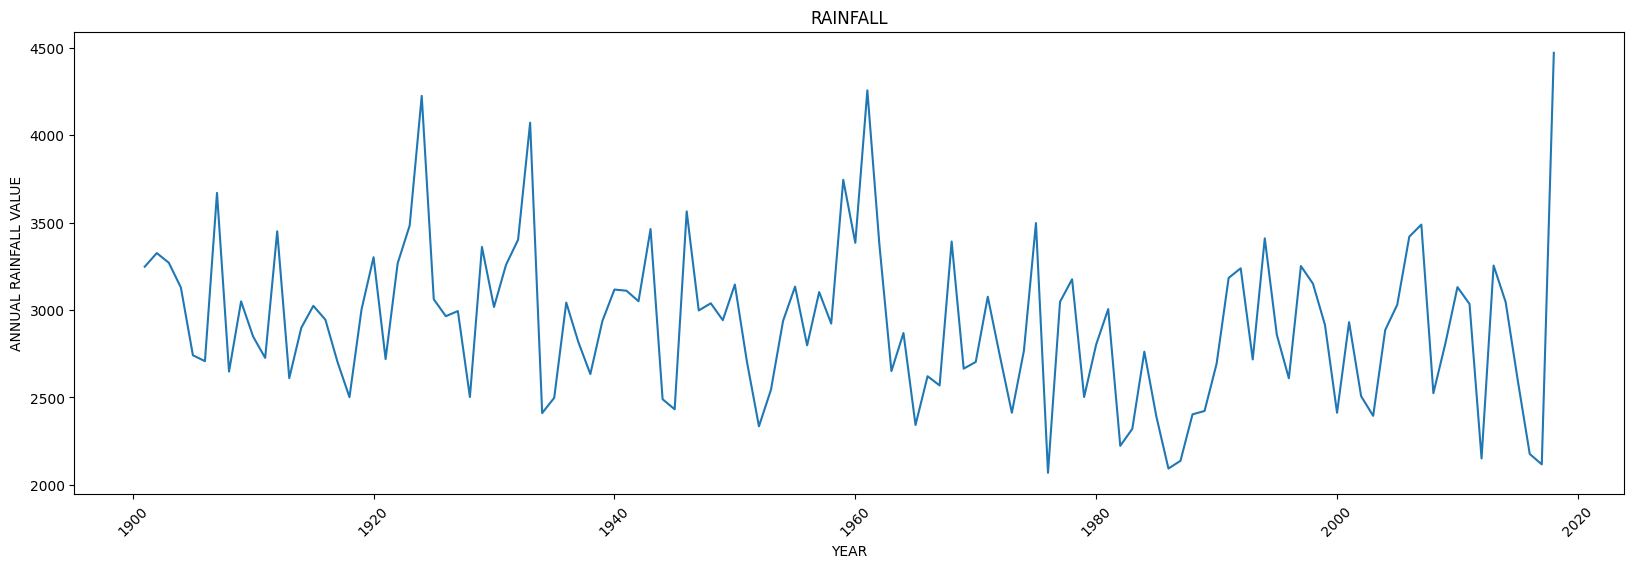

In [17]:
plt.figure(figsize=(20,6))
plt.plot(df['YEAR'],df[' ANN_RAINFALL'])
plt.xlabel('YEAR')
plt.ylabel('ANNUAL RAINFALL VALUE')
plt.title('RAINFALL')
plt.xticks(rotation = 45)
plt.show()

As we are done with our analysis, we came to a conclusion that the important features in this dataset are "JUN","JULY","OCTOBER","ANNULA RAINFALL","FLOODS"
because  in thes months only we have seen the peak in rainfall which can be the major source of causing the flood.


# Impactful columns

In [18]:
impactful_columns = ['YEAR', 'JUN', 'JUL', 'OCT', ' ANN_RAINFALL', 'FLOODS']

data = df[impactful_columns]

In [19]:
data

,YEAR,JUN,JUL,OCT,ANN_RAINFALL,FLOODS
0,1901,824.6,743.0,266.9,3248.6,YES
1,1902,390.9,1205.0,358.4,3326.6,YES
2,1903,558.6,1022.5,354.1,3271.2,YES
3,1904,1098.2,725.5,328.1,3129.7,YES
4,1905,850.2,520.5,383.5,2741.6,NO
...,...,...,...,...,...,...
113,2014,454.4,677.8,355.5,3046.4,YES
114,2015,563.6,406.0,308.1,2600.6,NO
115,2016,522.2,412.3,225.9,2176.6,NO
116,2017,498.5,319.6,192.4,2117.1,NO


Now, I want to label the months as 0 and 1.

0: will represent low rainfall.
1: will represent high rainfall.

Similarly for Annual rainfall:

0: will represent low rainfall in that year
1: will represent high rainfall in that year


# but how much rainfall index is considered as heavy rainfall?

In [20]:
#if their rainfall index value > median value then it will be considered as heavy rainfall

In [21]:
#let's calculate th median of columns and setas their threshold value
threshold_jun = data['JUN'].median().astype(int)
threshold_jul = data['JUL'].median().astype(int)
threshold_oct = data['OCT'].median().astype(int)
threshold_ar = data[' ANN_RAINFALL'].median().astype(int)

threshold_jun, threshold_jul, threshold_oct, threshold_ar

(625, 691, 284, 2934)

In [22]:
thresholds = {
    'JUN': 625,
    'JUL': 691,
    'OCT': 284,
    ' ANN_RAINFALL': 2934
}

for col, threshold in thresholds.items():
    data[col] = (data[col] > threshold).astype(int)

data.head()

<ipython-input-22-1978146f624f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = (data[col] > threshold).astype(int)
<ipython-input-22-1978146f624f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = (data[col] > threshold).astype(int)
<ipython-input-22-1978146f624f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,YEAR,JUN,JUL,OCT,ANN_RAINFALL,FLOODS
0,1901,1,1,0,1,YES
1,1902,0,1,1,1,YES
2,1903,0,1,1,1,YES
3,1904,1,1,1,1,YES
4,1905,1,0,1,0,NO


In [23]:
data.shape

(118, 6)

# CONTINGENCY TABLE

In [24]:
pd.crosstab(index=data['JUN'],columns = data['FLOODS'],margins = True, margins_name='Total')

FLOODS,NO,YES,Total
JUN,,,
0,42,16,58
1,16,44,60
Total,58,60,118


In [ ]:
#Q: What are the chances of Floods when there is a heavy rainfall in June?

In [25]:
pd.crosstab(index = data['JUN'],
            columns = data['FLOODS'],
            margins=True,
            margins_name='Total')

FLOODS,NO,YES,Total
JUN,,,
0,42,16,58
1,16,44,60
Total,58,60,118


Now there are few observations we can make based on the output:


1.   There is a strong association between the conditions in June("JUN") met (JUN=1) and occurence of floods(FLOODS = YES).
(Frequency = 44)

*   When it rained more than threshold(44), there is a higher likelihood of flood occuring.

2.   There is a weak association between the conditions in June("JUN"=0) and occurence of floods. (frequency = 16)


*   When it rained less(freq = 16), there is a low likelihood of flood occuring.





# Calculate probability of flood given that rainfall in June is greater than median june rainfall value(threshold for heavy rainfall)

In [26]:
pd.crosstab(data['JUN'],
            data['FLOODS'],
            margins= True,
            margins_name = 'Total')

FLOODS,NO,YES,Total
JUN,,,
0,42,16,58
1,16,44,60
Total,58,60,118


In [27]:
# P_F and P_J = 44, P_J = 60
# Prob_flood_jun = (P_F and P_J)/P_J #conditional probability
# P(Flood = Yes | June = 1)
ans = 44/60
print(ans)

0.7333333333333333


# JUNE

In [32]:
# OR use normalise
pd.crosstab(data['JUN'],
            data['FLOODS'],
            margins= True,
            margins_name = 'Total',
            normalize='index')

FLOODS,NO,YES
JUN,,
0,0.724138,0.275862
1,0.266667,0.733333
Total,0.491525,0.508475


CONCLUSION:
There is 73.33 chance  of floods when there is a heavy rainfall in June.

# JULY

In [34]:
pd.crosstab(data['JUL'],
            data['FLOODS'],
            margins= True,
            margins_name = 'Total',
            normalize='index')

FLOODS,NO,YES
JUL,,
0,0.644068,0.355932
1,0.338983,0.661017
Total,0.491525,0.508475


CONCLUSION: There is 66.10 chance of floods when there is a heavy rainfall in June.

# JUNE AND JULY BOTH

In [38]:
pd.crosstab(index = [data['JUN'],data['JUL']],
            columns = data['FLOODS'],

            margins_name = 'Total',
            normalize='index')

FLOODS         NO       YES
JUN JUL                    
0   0    0.862069  0.137931
    1    0.586207  0.413793
1   0    0.433333  0.566667
    1    0.100000  0.900000

CONCLUSION: There is 90.00 chance of floods when there is a heavy rainfall in June and July.